# Stock Forecasting using ARCH

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from arch import arch_model
from arch.univariate import ConstantMean, GARCH, Normal

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2019-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3822860000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4213410000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4104710000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4083030000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


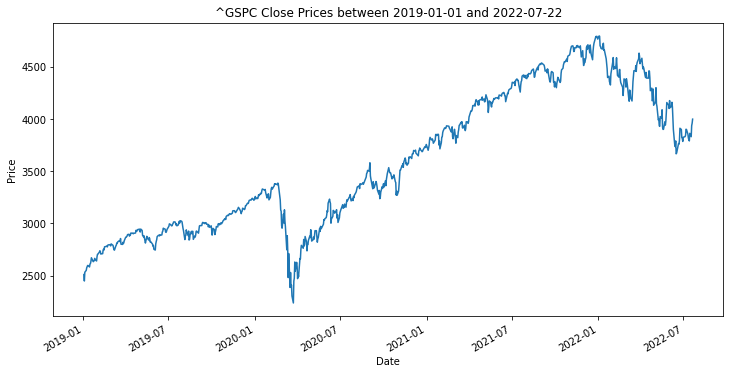

In [5]:
plt.figure(figsize = (12, 6))
plt.title(symbol + ' Close Prices between {} and {}'.format(
    start,
    end
))
df['Adj Close'].plot()
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [6]:
returns = 100 * df['Adj Close'].pct_change().dropna()
am = arch_model(returns , vol='Garch', p=1, o=0, q=1, dist='Normal')

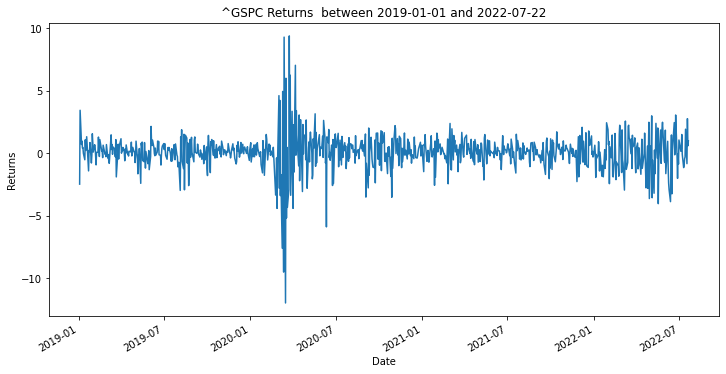

In [7]:
plt.figure(figsize = (12, 6))
plt.title(symbol + ' Returns  between {} and {}'.format(
    start,
    end
))
returns.plot()
plt.ylabel('Returns')
plt.xlabel('Date')
plt.show()

In [8]:
split_date = dt.datetime(2021,1,1)
res = am.fit(last_obs=split_date)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 287992170992.0543
Iteration:      2,   Func. Count:     14,   Neg. LLF: 277501828.2214922
Iteration:      3,   Func. Count:     21,   Neg. LLF: 890.1100570837939
Iteration:      4,   Func. Count:     27,   Neg. LLF: 740.4076901637611
Iteration:      5,   Func. Count:     33,   Neg. LLF: 718.5437832909597
Iteration:      6,   Func. Count:     38,   Neg. LLF: 718.5225790382601
Iteration:      7,   Func. Count:     44,   Neg. LLF: 718.27584269182
Iteration:      8,   Func. Count:     49,   Neg. LLF: 718.2756940710361
Iteration:      9,   Func. Count:     54,   Neg. LLF: 718.2756860125044
Iteration:     10,   Func. Count:     58,   Neg. LLF: 718.2756856615104
Optimization terminated successfully    (Exit mode 0)
            Current function value: 718.2756860125044
            Iterations: 10
            Function evaluations: 58
            Gradient evaluations: 10


In [9]:
forecasts = res.forecast(horizon=5, start=split_date, method='simulation')

In [10]:
print(forecasts.variance.tail())

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2022-07-15  1.550710  1.608117  1.657004  1.729110  1.758168
2022-07-18  1.418105  1.475331  1.547598  1.623223  1.624218
2022-07-19  3.068927  3.087217  3.089503  3.107188  3.100530
2022-07-20  2.263094  2.290367  2.306347  2.343617  2.412932
2022-07-21  1.846450  1.900266  1.980048  2.058787  2.075608


In [11]:
day = dt.timedelta(1)
print(forecasts.variance[split_date - 5 * day:split_date + 5 * day])

                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2020-12-28       NaN       NaN       NaN       NaN       NaN
2020-12-29       NaN       NaN       NaN       NaN       NaN
2020-12-30       NaN       NaN       NaN       NaN       NaN
2020-12-31       NaN       NaN       NaN       NaN       NaN
2021-01-04  1.045478  1.097671  1.143591  1.174938  1.210939
2021-01-05  0.873003  0.890871  0.950585  0.983595  1.031568
2021-01-06  0.711217  0.741003  0.802838  0.846551  0.872572


In [21]:
forecasts.variance.shape

(894, 5)

In [22]:
returns.shape

(894,)

In [23]:
df.append(forecasts.variance)

,Open,High,Low,Close,Adj Close,Volume,Returns,h.1,h.2,h.3,h.4,h.5
Date,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3.733160e+09,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3.822860e+09,-2.475673,NaN,NaN,NaN,NaN,NaN
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4.213410e+09,3.433571,NaN,NaN,NaN,NaN,NaN
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4.104710e+09,0.701043,NaN,NaN,NaN,NaN,NaN
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4.083030e+09,0.969529,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.550710,1.608117,1.657004,1.729110,1.758168
2022-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.418105,1.475331,1.547598,1.623223,1.624218
2022-07-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.068927,3.087217,3.089503,3.107188,3.100530


In [ ]:
ddf2.append(forecasts.variance)

In [ ]:
df2

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(forecasts.variance)
plt.plot(abs(returns))
